# NO 2 praproses data

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('/content/mobileprice_modified.csv')

# **Replace 'price_range' with the actual name of your target column**
target_column_name = 'price_range'

# 1. Pisahkan atribut prediktor dan target
X = data.drop(columns=[target_column_name])  # Use the actual target column name
y = data[target_column_name]  # Use the actual target column name

# Tampilkan statistik deskriptif sebelum pengisian missing value dan standarisasi
print("Statistik deskriptif sebelum pengisian missing value dan standarisasi:\n")
print(X.describe())

# 2. Mengisi missing value dengan SimpleImputer (strategi mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# 3. Standarisasi atribut prediktor dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Tampilkan statistik deskriptif setelah pengisian missing value dan standarisasi
print("\nStatistik deskriptif setelah pengisian missing value dan standarisasi:\n")
print(X_scaled.describe())

Statistik deskriptif sebelum pengisian missing value dan standarisasi:

       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.2

# NO 3 membangun model

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data
data = pd.read_csv('/content/mobileprice_modified.csv')

# 1. Pisahkan atribut prediktor dan target
X = data.drop(columns=['price_range'])  # Ganti 'target_column' dengan nama kolom target yang sesuai
y = data['price_range']  # Ganti 'target_column' dengan nama kolom target yang sesuai

# 2. Mengisi missing value dengan SimpleImputer (strategi mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 3. Standarisasi atribut prediktor dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Bagi data menjadi data training dan testing (85% training, 15% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# 5. Bangun model SVM dan latih model
model = SVC()
model.fit(X_train, y_train)

# 6. Prediksi data testing
y_pred = model.predict(X_test)

# 7. Tampilkan confusion matrix dan akurasi dari model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAkurasi Model:", accuracy)


Confusion Matrix:
 [[74  6  0  0]
 [ 5 60  7  0]
 [ 0  8 56  4]
 [ 0  0  6 74]]

Akurasi Model: 0.88


# no 4 clustering

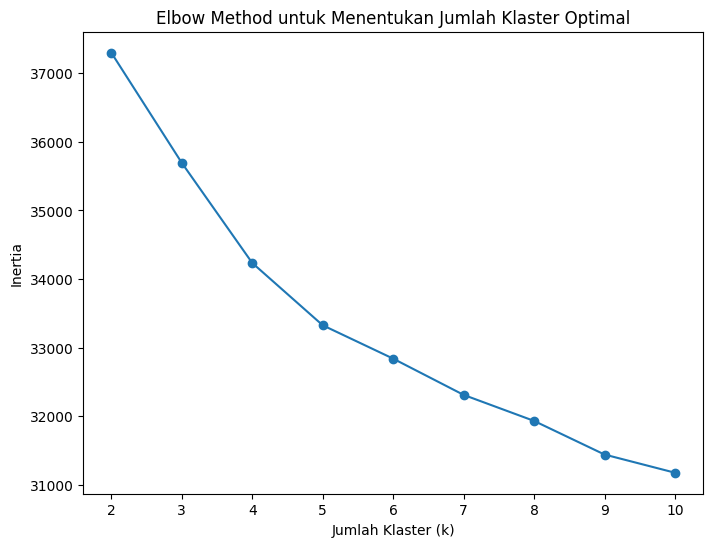

Silhouette Score untuk model clustering dengan 3 klaster: 0.0605507481735327
   price_range  Cluster
0            1        0
1            2        2
2            2        2
3            2        2
4            1        2


In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/mobileprice_modified.csv')

# 1. Pisahkan atribut prediktor dan target
X = data.drop(columns=['price_range'])  # Ganti 'target_column' dengan nama kolom target yang sesuai

# 2. Mengisi missing value dengan SimpleImputer (strategi mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 3. Standarisasi atribut prediktor dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Menentukan jumlah klaster optimal dengan Elbow Method
inertia = []
k_values = range(2, 11)  # Jumlah klaster dari 2 hingga 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method untuk menentukan jumlah klaster optimal
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
plt.show()

# 5. Melatih model K-Means dengan jumlah klaster optimal (misalnya, k = 3)
# (Gantilah k sesuai hasil dari Elbow Method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score untuk model clustering dengan {optimal_k} klaster: {silhouette_avg}")

# 7. Tambahkan label klaster ke dataset asli
data['Cluster'] = clusters

# Tampilkan sebagian hasil clustering
print(data[['price_range', 'Cluster']].head())  # Ganti 'target_column' dengan kolom target yang sesuai
